## Part 1:  Linear regression on medical insurance data

We will try to predict insurance charges based on a collection of features that include age, gender, body-mass-index (BMI), number of children, whether a person smokes, and the region in the US the live in.
Since the file contains string data in addition to numeric data let's first read the file using the Python `requests` module:

In [7]:
import requests
# if you don't have requests installed you can use urlopen which is part
# of the python standard library
# from urllib.request import urlopen
link = "https://github.com/asabenhur/CS345/raw/master/fall22/data/insurance.csv"
# retrieve the contents of the file
contents = requests.get(link)

Let's take a look at the first five rows of the data:

In [2]:
contents.text.split()[:5]

['age,sex,bmi,children,smoker,region,charges',
 '19,female,27.9,0,yes,southwest,16884.924',
 '18,male,33.77,1,no,southeast,1725.5523',
 '28,male,33,3,no,southeast,4449.462',
 '33,male,22.705,0,no,northwest,21984.47061']

As you can see the header specifies the names of the features:

```
age,sex,bmi,children,smoker,region,charges
```

The names are self explanatory.  We will use the last column as our label/target variable, and try to predict it from the other variables.

Since the data is a mix of numerical and categorical variables, we will need to do some work to create a feature matrix from this file.

This data has three types of features:

* Numerical data (the age, bmi, and children features)
* Categorical data that has one of two values (the sex and smoker features)
* Categorical data that has more than two possible values.  The "region" feature has the values "southwest", "southeast", "northwest", and "northeast".

Numerical data can be left as is (but may need to be standardized); binary categorical data can be converted to 0/1.  Categorical variables with more than two possible values require a different approach, which is called "one-hot-encoding", where each value receives its own feature, and the single categorical variable is replaced with a set of features.  The number of features equals the number of unique values that the categorical variable takes, and a categorical value is encoded as a vector of zeros, with a single value of one in the feature that corresponds to the given value.  Let us demonstrate this using the one-hot-encoder of scikit-learn on our "region" variable:

In [3]:
from sklearn.preprocessing import OneHotEncoder

# a mock dataset of regions:
X = [['southwest'], ['southeast'], ['northwest'], ['northeast']]
# create an instance of one hot encoder
encoder = OneHotEncoder()
# apply it to the data:
encoder.fit_transform(X).toarray()
# we have converted the output of fit_transform from a sparse array
# type to a regular NumPy array so we can easily see the values

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]])

In your code you may not use the scikit-learn one-hot-encoder.

Now, you might ask why not simply encode these four values using the number 0-3.  The issue with doing that is that this representation imposes an order on the values, an order that does not necessarily reflect the interpretation of these features in the real world.

Your tasks are as follows:

* Create a feature matrix and labels vector from the given data as described above.
* Split the data into separate train and test sets with 30% of the data reserved for testing.
* Evaluate the error of linear regression on the train and test sets.  In doing so, first standardize the features.  Note that not all the features should be standardized - only the age and BMI features need that, because they are significantly larger than one.  You can use the scikit-learn implementations for linear regression, but note that its implementation for standardization does not provide the necessary flexibility to perform standardization on a selected set of features only.  Note that when standardizing, *only the features need to be standardized*.  The labels should remain unaltered.
* As discussed in class, the magnitude of the components of the weight vector provide an indication of the usefulness of a feature. Using the components of the weight vector, choose a subset of the features that are most useful for the regression task (use the absolute value of the weight, because large negative values also suggest usefulness).  Compare the error before and after removing the features with the lowest weight vector components.  Comment on your results.

For computing regression error use mean asbsolute error (MAE).

In [8]:
#1st question of Part 1
import pandas as pd
from io import StringIO
import numpy as np
X = pd.read_csv(StringIO(contents.text), delimiter=',').values
y = X[:,-1]
X = X[:,:-1]

#Changing Male to 0 and Female to 1
X[X[:,1]=='male', 1] = 0
X[X[:,1]=='female', 1] = 1
#Changing No to 0 and Yes to 1
X[X[:,4]=='yes', 4] = 1
X[X[:,4]=='no', 4] = 0
#OneHotEncoder of region: southwest=0, southeast=1, northwest=2, northeast=3
regions = np.zeros((len(X), 4))
regions[X[:,5]=='southwest',0] = 1
regions[X[:,5]=='southeast',1] = 1
regions[X[:,5]=='northwest',2] = 1
regions[X[:,5]=='northeast',3] = 1
X = X[:,:-1]
X = np.hstack((X, regions))

In [9]:
#2nd and 3rd part of Part 1
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#X[age,sex,bmi,children,smoker,southwest, southeast, northwest, northeast]

#standardizing age
X[:,0] = (X[:,0] - (np.mean(X[:,0], axis=0))) / (np.std(X[:,0], axis=0))
#standardizing BMI
X[:,2] = (X[:,2] - (np.mean(X[:,2], axis=0))) / (np.std(X[:,2], axis=0))
#splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
#fitting the model on the train set
linreg = LinearRegression()
linreg.fit(X_train, y_train)
#compute predictions on train and test sets
y_test_pred = linreg.predict(X_test)
y_train_pred = linreg.predict(X_train)
#Compute and print MAE
mae_train_before = mean_absolute_error(y_train, y_train_pred)
mae_test_before = mean_absolute_error(y_test, y_test_pred)
print(f'MAE on Training Set: {mae_train_before}')
print(f'MAE on Test Set: {mae_test_before}')

MAE on Training Set: 4112.4600599405785
MAE on Test Set: 4265.532445901738


In [16]:
#4th question of Part 1
#instantiate and fit the model
linreg = LinearRegression()
linreg.fit(X,y)
# print the coefficients
print (f'Weight of Age: {linreg.coef_[0]}')
print (f'Weight of Sex: {linreg.coef_[1]}')
print (f'Weight of BMI: {linreg.coef_[2]}')
print (f'Weight of Children: {linreg.coef_[3]}')
print (f'Weight of Smoker: {linreg.coef_[4]}')
print (f'Weight of Southwest: {abs(linreg.coef_[5])}')
print (f'Weight of Southeast: {abs(linreg.coef_[6])}')
print (f'Weight of Northwest: {abs(linreg.coef_[7])}')
print (f'Weight of Northeast: {abs(linreg.coef_[8])}')
#selecting only the Age, BMI, and Smoker features because they had the biggest weights
X_most_useful = np.hstack((np.stack((X[:,0], X[:,2]), axis=1), X[:,4].reshape(-1,1)))
#splitting the new dataset into train and test sets
X_train_most_useful, X_test_most_useful, y_train, y_test = train_test_split(X_most_useful, y, test_size=0.3)
#fitting the model on the train set
linreg.fit(X_train_most_useful, y_train)
#compute predictions on train and test sets
y_test_pred = linreg.predict(X_test_most_useful)
y_train_pred = linreg.predict(X_train_most_useful)
#Compute and print MAE
mae_train_after = mean_absolute_error(y_train, y_train_pred)
mae_test_after = mean_absolute_error(y_test, y_test_pred)
print()
pd.DataFrame([[mae_train_before, mae_test_before],
              [mae_train_after, mae_test_after]], 
             index=['All Features','Only Useful Featues'], columns=['Train','Test'])

Weight of Age: 3607.4727361941873
Weight of Sex: 131.31435939511292
Weight of BMI: 2067.6919658434217
Weight of Children: 475.50054514913546
Weight of Smoker: 23848.534541912824
Weight of Southwest: 373.0417562725024
Weight of Southeast: 448.0128143594975
Weight of Northwest: 234.04533560368068
Weight of Northeast: 587.0092350283215



,Train,Test
All Features,4112.460060,4265.532446
Only Useful Featues,4206.589346,4269.081864


**In the 2nd and 3rd parts of the assignment, I selected age, bmi, and smoker to be the most useful featues. I used those three features and calculated the mean average error. In the table above, the MAE for all features and only useful features are recorded. You can observe that the training set is better fitting with all features than only three features. This is accurate because the model has more information that it can analyze, but the useful features only has three features. In the 2nd column, you can see that the MAE for test sets are very similar. This suggests that using only the three features is just as good as using all features in the original dataset. The other features might be redundant and could be dropped to save computational resources and reduce overhead.**

## Part 2:  polynomial regression

In this part we will explore polynomial regression using the [California housing dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing), which is distributed with scikit-learn.

In [1]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
X = data.data
y = data.target

A complete description of the dataset and its features is contained in the `DESCR` attribute of the dataset:

```python
print(data.DESCR)
```

Let's plot a histogram of the labels:

(array([   9.,   14.,   61.,  255.,  538.,  676.,  546.,  803.,  881.,
         706.,  812.,  715.,  836.,  815.,  921.,  960.,  786.,  817.,
         703.,  505.,  620.,  661.,  578.,  508.,  432.,  439.,  463.,
         331.,  320.,  216.,  224.,  232.,  245.,  252.,  286.,  193.,
         160.,  149.,  117.,  133.,  104.,   99.,   80.,   90.,  106.,
          66.,   49.,   51.,   47., 1030.]),
 array([0.14999  , 0.2469904, 0.3439908, 0.4409912, 0.5379916, 0.634992 ,
        0.7319924, 0.8289928, 0.9259932, 1.0229936, 1.119994 , 1.2169944,
        1.3139948, 1.4109952, 1.5079956, 1.604996 , 1.7019964, 1.7989968,
        1.8959972, 1.9929976, 2.089998 , 2.1869984, 2.2839988, 2.3809992,
        2.4779996, 2.575    , 2.6720004, 2.7690008, 2.8660012, 2.9630016,
        3.060002 , 3.1570024, 3.2540028, 3.3510032, 3.4480036, 3.545004 ,
        3.6420044, 3.7390048, 3.8360052, 3.9330056, 4.030006 , 4.1270064,
        4.2240068, 4.3210072, 4.4180076, 4.515008 , 4.6120084, 4.7090088,
        

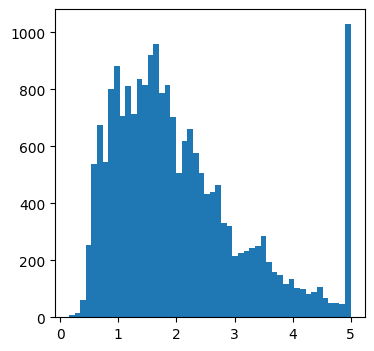

In [88]:
from matplotlib import pyplot as plt
plt.figure(figsize=(4,4))
plt.hist(y, bins=50)

Here is your task:

* Compute the error of polynomial basis regression as a function of the degree of the polynomial for the Boston housing dataset.  Start with degree equal to 1, i.e. using the features as-is.  In each case compute accuracy for both the training set, and a separate test set.  Report the results as a nicely formatted table and comment on what you observe:  is there overfitting or underfitting?  You can use the scikit-learn [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) functionality in conjunction with the [pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) class as shown in class.  It is *highly recommended* to standardize the features for this task, and to include standardization as part of the pipeline.
* Choose a value of the degree for which polynomial basis regression yields overfitting.  We will use ridge regression to reduce the effect of overfitting.  Plot the accuracy of polynomial basis regression as a function of the regularization parameter $\alpha$ for both the training set and test set.  Is there a value of $\alpha$ for which you are able to obtain test set error that is similar or better than the error of linear regression?  Are you observing overfitting or underfitting in your plot?
* As a baseline, compute the error of a simple regression method that for a given regression problem always returns the median label value.  Compare this error with the error using linear regression and comment on the result.  Why is computing the error of this naive method a useful thing to do?

In [5]:
#Features in X: [MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude]
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

degrees = [1,2,3,4,5,6]
errors = []

#Polynomial basis regression
for i in degrees:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    poly = PolynomialFeatures(degree=i,include_bias=False)
    linreg = LinearRegression()
    
    pipeline = Pipeline([('scalar', StandardScaler()), ('poly', poly), ('linreg', linreg)])
    pipeline.fit(X_train, y_train)
    
    y_train_pred = pipeline.predict(X_train) 
    y_test_pred = pipeline.predict(X_test)
    
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    
    errors.append([mae_test, mae_train])

#Compute and print dataframe
pd.DataFrame(errors, columns=['test', 'train'], index=degrees)
    


,test,train
1,0.524288,0.535342
2,0.479219,0.461488
3,0.423315,0.421324
4,25656.823449,0.375900
5,75053.880031,0.336195
6,5173.189566,0.291601


**From the table above, you can observe that after degree 3, the errors are drastically different for the test sets. 1, 2, and 3 are similar in terms of test errors, but the train errors decrease, which indicates that the model performs better at higher degrees until 3. Thereafter, the test errors are very high. In contrast, the train errors continue to decrease, which indicates overfitting. Models after degree 3 perform well on the train sets but not on test sets indicating that the models have memorized the train sets rather than learning from them.**

c:\Users\ayus3\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=8.52138e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\ayus3\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=8.52138e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\ayus3\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=8.52138e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\ayus3\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.95238e-18): result may not be accurate.
  return linalg.solve

,test,train
0.0001,0.635596,0.372447
0.0010,0.613700,0.372549
0.0100,0.573974,0.373057
0.1000,0.468572,0.376050
1.0000,0.449174,0.382544
10.0000,0.438077,0.392719
100.0000,0.449682,0.417980
1000.0000,0.498823,0.475220


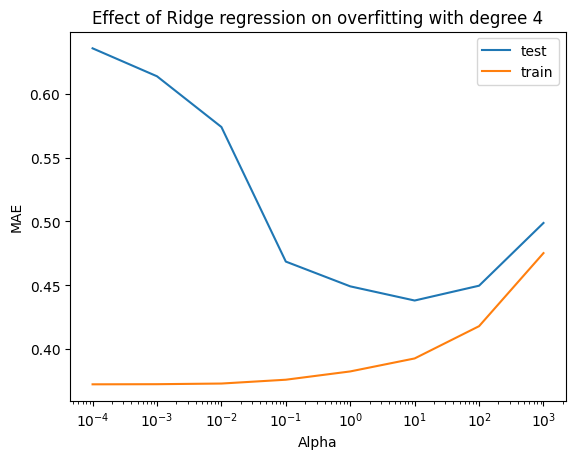

In [6]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from matplotlib import pyplot as plt
import numpy as np

alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
errors = []

for i in alphas:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)#results varied without random_state, so I set it to 1
    ridge_model = make_pipeline(StandardScaler(), PolynomialFeatures(4), Ridge(alpha=i))
    ridge_model.fit(X_train, y_train)
    y_fit_test = ridge_model.predict(X_test)
    y_fit_train = ridge_model.predict(X_train)
    
    mae_train = mean_absolute_error(y_train, y_fit_train)
    mae_test = mean_absolute_error(y_test, y_fit_test)
    
    errors.append([mae_test, mae_train])
errors = np.array(errors)
#Compute and print dataframe
plt.semilogx(alphas, errors[:,0], label='test')
plt.semilogx(alphas, errors[:,1], label='train')
plt.xlabel('Alpha')
plt.ylabel('MAE')
plt.title('Effect of Ridge regression on overfitting with degree 4')
plt.legend()

pd.DataFrame(errors, columns=['test', 'train'], index=alphas)

**As noted in the comment above, when I use random_state, I get results that show that applying ridge regression helps the model reduce errors. However, when using it without the random_state, the results are varied. I set this to one after asking a TA for help. In the table and graph above, you can see that as the alpha values increase, the errors are also getting smaller. At alpha=0.0001, the test value is 0.63 and as alpha approaches 1, it has decerased to 0.44. This result is very similar to the original model, where degree 3 had the lowest error at .42. Redge regression has definitely helped the model decrease its errors. In the original model for degree 4, the error for test was 25,656, but with ridge regression, the results were closer to the original for degrees 1,2, or 3. You can also observe that after alpha=10, the erros for both train and test start to increase, which is indicative of underfitting. The model is becoming too regularized and losing its ability to see the patterns in the data.**

In [25]:
#using median of y to compute MAE
median_pred = np.full(y.shape, np.median(y))
median_mae = mean_absolute_error(y, median_pred)
#using linreg to compute MAE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
reg_pred = linreg.predict(X_test)
reg_mae = mean_absolute_error(y_test, reg_pred)
#printing both MAEs
print(f'MAE of median: {median_mae}')
print(f'MAE of Linreg: {reg_mae}')


MAE of median: 0.8835413124999999
MAE of Linreg: 0.5199746599763163


**The MAE for the median values is a benchmark for models. When we used classification, we noted that 0.5 was a benchmark to see if the model had accuracies better than guessing at random. The simple model for regression serves the same purpose; it lets us know if the model is doing a better job that simply just selecting the median value from the dataset. You would want the MAE of a model to be better than the median. In the results above, you can see that the MAE is significantly lower for the linear regression model, which indicates that it is a better model.**

### Your Report

Answer the questions in the cells reserved for that purpose.

### Submission

Submit your report as a Jupyter notebook via Canvas.  Running the notebook should generate all the plots in your notebook.

### Grading 

Although we will not grade on a 100 pt scale, the following is a grading sheet that will help you:


```
Grading sheet for assignment 4

Part 1:  5 points.
Dataset creation:  all the features were correctly converted to 
numerical values and the BMI and age values were standardized (1.5 pts)
Evaluation of linear regression (1.5 pts)
Feature selection based on weight vector magnitude, including discussion of the choice of features (2 pts)

Part 2:  5 points.
Train/test accuracy as a function of the degree of polynomial 
regression (1.5 pts)
Identification of model that exhibits overfitting (1 pt)
Successful application of ridge regression to prevent overfitting (2 pts)
Baseline comparison (0.5 pt)

```

Grading will be based on the following criteria:

  * Code correctness.
  * Code is well organized.
  * Plots and other results are well formatted and easy to understand.
  * Interesting and meaningful observations made where requested.